In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.proportion import proportion_confint



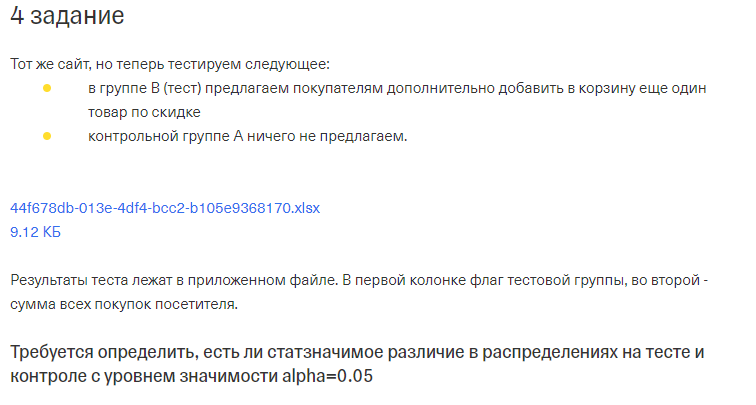

In [5]:
data = pd.read_excel('data.xlsx')
data.head()

,Группа,Значение
0,А,1499
1,А,1499
2,А,1099
3,А,1099
4,А,109


In [6]:
data = data.rename(columns={'Группа': 'group', 'Значение': 'money'})

#В данных буква A шла русским символом, меняем.
data.loc[(data.group == 'А'), 'group'] = 'A'

In [7]:
df_a = data.query("group == 'A'")
df_b = data.query("group == 'B'")


mean in A group:  891.2448979591836
mean in B group:  881.1785714285714


[]

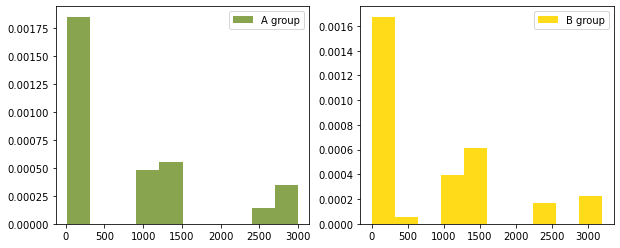

In [8]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(10,4)
ax[0].hist(df_a.money, density=True, label='A group' ,color = 'olivedrab', alpha=0.8 )
ax[1].hist(df_b.money, density=True, label='B group' ,color = 'gold', alpha=0.9 )


print('mean in A group: ', df_a.money.mean())
print('mean in B group: ', df_b.money.mean())

ax[0].legend()
ax[1].legend()
plt.plot()

In [11]:
#Применим критерий Манна-Уитни, чтобы проверить есть ли статзначимая разница в распределении потраченых денег

stat, p_val = st.mannwhitneyu(df_a.money,df_b.money,alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value',round(p_val,4),'\nU-критерий',stat)
else:
    print('Разница статистически значима','\np-value',round(p_val,4),'\nU-критерий',stat)

Статистически значимой разницы нет 
p-value 0.7215 
U-критерий 1317.5
